In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import glob
from PIL import Image
import shutil
import random

In [47]:
url = r"D:\USER\Desktop\area de trabalho\ED\Meus treinos\Fiap\redes neurais\proj- flores\flowers"
total_images = 0
class_count = {}

for class_name in os.listdir(url):
    class_path = os.path.join(url, class_name)
    if os.path.isdir(class_path):  # Corrigido aqui
        num_images = len(glob.glob(os.path.join(class_path, "*.jpg"))) + \
                     len(glob.glob(os.path.join(class_path, "*.jpeg"))) + \
                     len(glob.glob(os.path.join(class_path, "*.png")))  # Corrigido aqui
        class_count[class_name] = num_images
        total_images += num_images

print(f"Total de imagens: {total_images}")
print("\nImagens por classe:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count} imagens")


Total de imagens: 4301

Imagens por classe:
daisy: 748 imagens
dandelion: 1052 imagens
rose: 784 imagens
sunflower: 733 imagens
tulip: 984 imagens


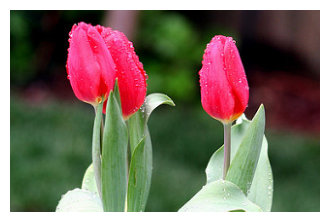

In [48]:
folder_name=os.path.join(url,"tulip")

folders_image=glob.glob(os.path.join(folder_name, "*.jpg")) + \
              glob.glob(os.path.join(folder_name, "*.jpeg")) + \
              glob.glob(os.path.join(folder_name, "*.png")) 
if folders_image:
    img=Image.open(folders_image[0])

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"Nenhuma imagem encontrada em {folder_name}")


In [49]:
import os
import shutil
import random

original_url = r"D:\USER\Desktop\area de trabalho\ED\Meus treinos\Fiap\redes neurais\proj- flores\flowers"
output_url = r"D:\USER\Desktop\area de trabalho\ED\Meus treinos\Fiap\redes neurais\proj- flores\flowers_split"

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

if os.path.exists(output_url) and all(os.path.exists(os.path.join(output_url, split)) for split in ["train", "validation", "test"]):
    print(f"Divisão realizada")

    dataset_summary = {"train": {}, "validation": {}, "test": {}}
    for split in ["train", "validation", "test"]:
        print(f"Pasta {split.upper()} Conjunto")
        for class_name in os.listdir(os.path.join(output_url, split)):
            class_path = os.path.join(output_url, split, class_name)
            if os.path.isdir(class_path):
                num_images = len(os.listdir(class_path))
                dataset_summary[split][class_name] = num_images
                print(f"{class_name}: {num_images} imagens")

else:
    print(f"Dividindo o conjunto em train, validation e test...")

    for split in ["train", "validation", "test"]:
        for class_name in os.listdir(original_url):
            os.makedirs(os.path.join(output_url, split, class_name), exist_ok=True)

    for class_name in os.listdir(original_url):
        class_path = os.path.join(original_url, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            random.shuffle(images)

            train_split = int(train_ratio * len(images))
            val_split = int(val_ratio * len(images)) + train_split

            for i, image in enumerate(images):
                src_path = os.path.join(class_path, image)

                if i < train_split:
                    dst_path = os.path.join(output_url, "train", class_name, image)
                elif i < val_split:
                    dst_path = os.path.join(output_url, "validation", class_name, image)
                else:
                    dst_path = os.path.join(output_url, "test", class_name, image)

                print(f"Copiando {src_path} -> {dst_path}")

                try:
                    shutil.copy(src_path, dst_path)
                except Exception as e:
                    print(f"Erro ao copiar {src_path} para {dst_path}: {e}")

    print("Dados divididos com sucesso!\n")


Divisão realizada
Pasta TRAIN Conjunto
daisy: 598 imagens
dandelion: 841 imagens
rose: 627 imagens
sunflower: 586 imagens
tulip: 787 imagens
Pasta VALIDATION Conjunto
daisy: 74 imagens
dandelion: 105 imagens
rose: 78 imagens
sunflower: 73 imagens
tulip: 98 imagens
Pasta TEST Conjunto
daisy: 76 imagens
dandelion: 106 imagens
rose: 79 imagens
sunflower: 74 imagens
tulip: 99 imagens


In [50]:
dataset_path=r"D:\USER\Desktop\area de trabalho\ED\Meus treinos\Fiap\redes neurais\proj- flores\flowers_split"

train_dir=os.path.join(dataset_path,'train')
validation_dir=os.path.join(dataset_path,'validation')
test_dir= os.path.join(dataset_path,'test')


IMAGE_SIZE=(128,128)
BATCH_SIZE=32

datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


validation_generator=datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"


)
validation_generator=datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False


)

class_label=list(train_generator.class_indices.keys())
print(f"Classes: {class_label}")



Found 3439 images belonging to 5 classes.
Found 428 images belonging to 5 classes.
Found 434 images belonging to 5 classes.
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [51]:
model=models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_label),activation='softmax')




])

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)